In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# 플롯의 기초 틀잡기
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

# 1->3 레이어 구성
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
# 손실함수, 옵티마이저 설정
model.compile(loss='mse', optimizer='SGD')

pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
# y값 범위 설정
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
# 이 위치에다 텍스트 적기
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
# plt를 저장하고 
plt.savefig('./plt/pred000.png')
# plt를 클리어 지우기
plt.clf()

# 반복문으로 학습시키면서 특정 인덱스 값마다 plt를 저장
epochs = 500
for i in range(1, epochs+1):
  model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
  pred = model.predict([1])

  if i % 25 == 0:
      plt.bar(np.arange(3), pred[0])
      plt.ylim(-1.1, 1.1)
      plt.xlabel('Output Node')
      plt.ylabel('Output')
      plt.text(-0.4, 0.8, 'Epoch ' + str(i))
      plt.tight_layout()
      plt.savefig('./plt/pred' + str(i).zfill(3) + '.png')
      plt.clf()

print(pred)
print(model.get_weights())

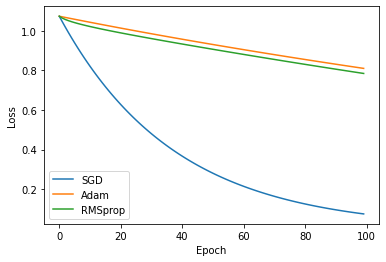

In [5]:
# 옵티마이저 비교하기

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model)
# 같은 3개지 모델의 옵티마이저를 다르게 만들기
model.compile(loss='mse', optimizer='SGD')
model2.compile(loss='mse', optimizer='Adam')
model3.compile(loss='mse', optimizer='RMSprop')

history = model.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history2 = model2.fit([1], [[0, 1, 0]], epochs=100, verbose=0)
history3 = model3.fit([1], [[0, 1, 0]], epochs=100, verbose=0)

loss = history.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']

plt.plot(loss, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()